# Viszualing the data

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [42]:
pdf_ocr_validation = pd.read_pickle("./pkl_cache/ocr_quality.pkl")
openai_ocr_correction = pd.read_pickle(
    "./pkl_cache/openai_ocr_correction_validation_v1.pkl"
)

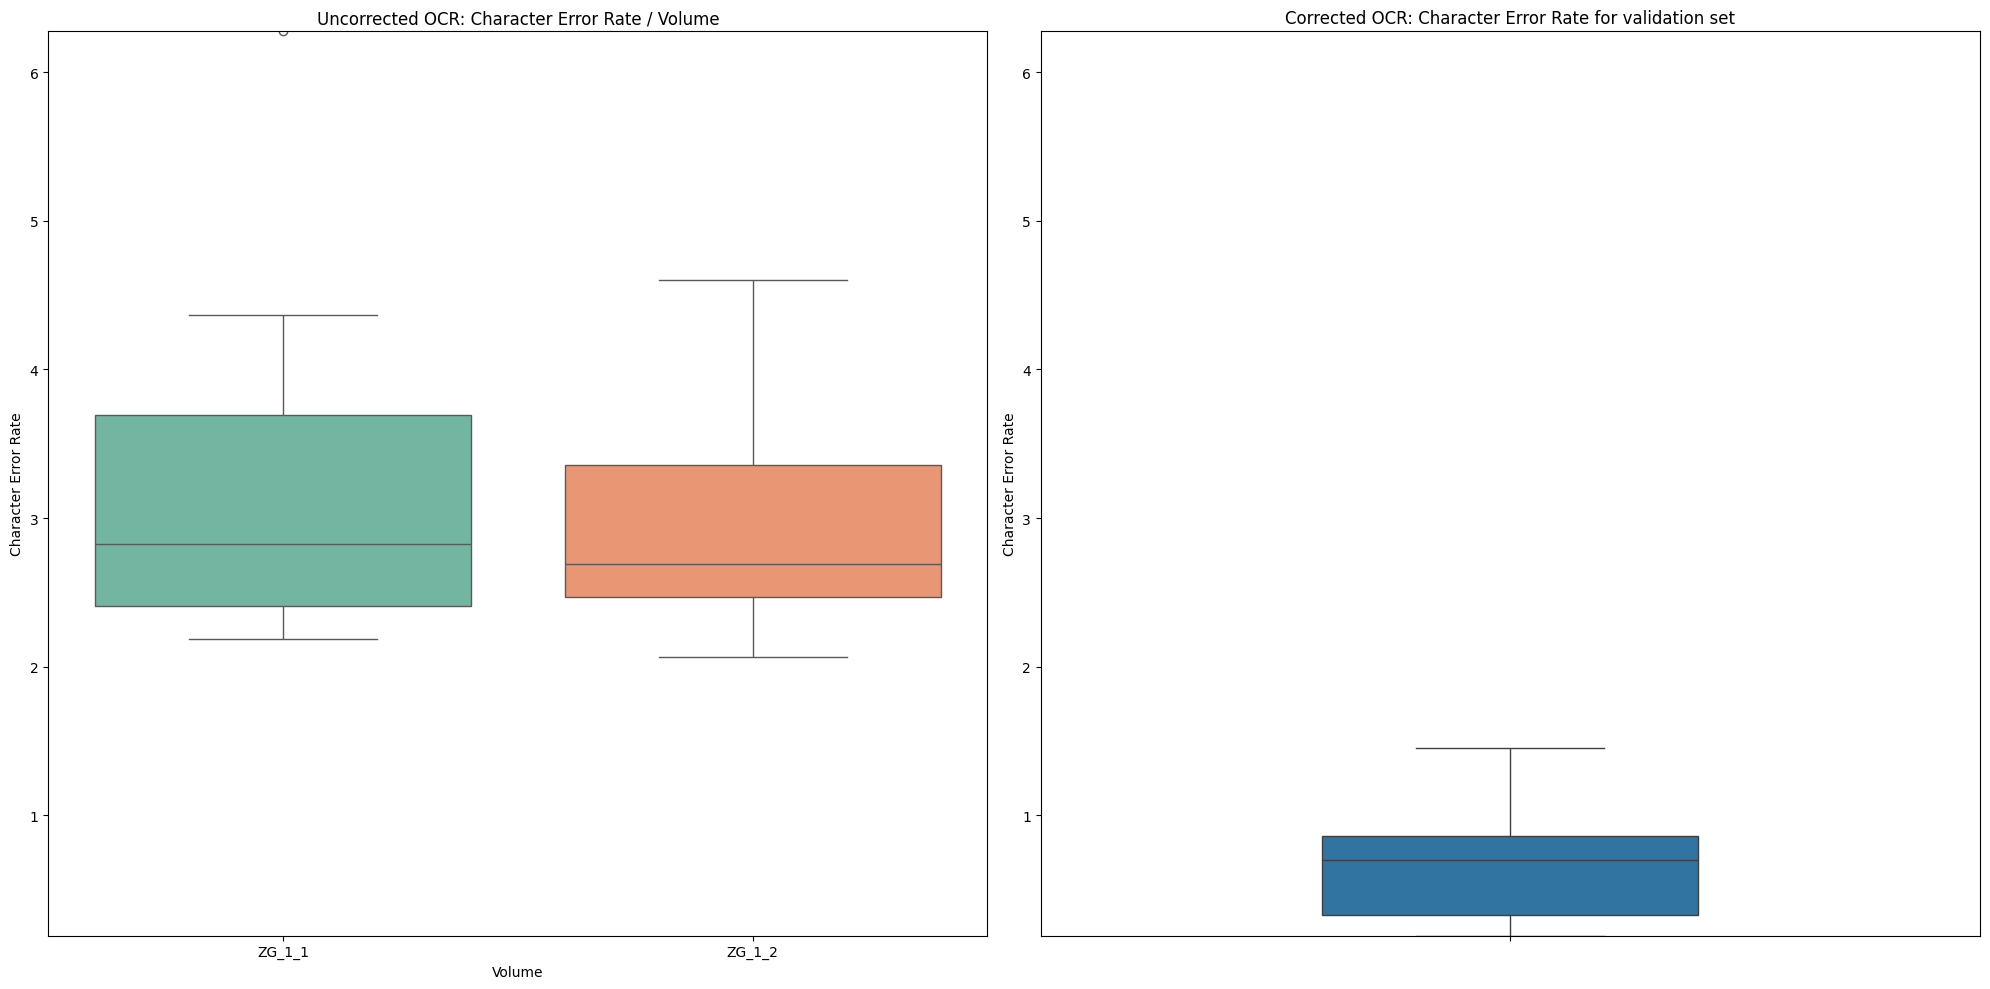

In [41]:
reshaped_ocr_validation_data = pd.melt(
    openai_ocr_correction,
    id_vars=["input_text"],
    value_vars=["cer"],
)

y_min = min(
    pdf_ocr_validation["cer"].min(), reshaped_ocr_validation_data["value"].min()
)
y_max = max(
    pdf_ocr_validation["cer"].max(), reshaped_ocr_validation_data["value"].max()
)


fig, ax = plt.subplots(1, 2, figsize=(20, 10))


plot_one = sns.boxplot(
    x="volume", y="cer", data=pdf_ocr_validation, ax=ax[0], palette="Set2", hue="volume"
)
plot_one.set_ylim(y_min, y_max)
plot_one.set_xlabel("Volume")
plot_one.set_ylabel("Character Error Rate")
ax[0].set_title("Uncorrected OCR: Character Error Rate / Volume", fontsize=12)

plot_two = sns.boxplot(
    x="variable", y="value", data=reshaped_ocr_validation_data, ax=ax[1], width=0.4
)
plot_two.set_ylim(y_min, y_max)
plot_two.set_ylabel("Character Error Rate")
plot_two.set_xlabel("")
plot_two.set_xticklabels([])
ax[1].set_title("Corrected OCR: Character Error Rate for validation set", fontsize=12)


plt.tight_layout()
plt.show()